In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap


# Figure 2 A-C: Bod et al. 2023

In [2]:
## Import dataset
time = sc.read_h5ad("timecourse_adata_annotated.h5ad")
## Focus on CD8 T cells
time = time[time.obs['annotation']=="CD8 T cells"]

time.X = None
time.X = time.layers['counts'].copy()
sc.pp.normalize_total(time,target_sum=10000)
time.layers['normcounts'] = time.X.copy()
sc.pp.log1p(time)
time.layers['lognormcounts'] = time.X.copy()


In [3]:
time.obs['group'] = time.obs['tissue'].astype(str) + "_" + time.obs['date'].astype(str)
time.obs['group'] = time.obs['group'].astype("category")

In [4]:
groups=['Tum_d16','Tum_d10','Tum_d7','dLN_d16','dLN_d10','dLN_d7','nLN_d16','nLN_d10','nLN_d7']
time.obs['group_ordered']=pd.Categorical(values=time.obs.group, categories=groups, ordered=True)

In [5]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 1, 1,1), (153/255, 47/255, 152/255,1)]  # White -> Purple
cmap_name = 'cstm_purple'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=500)

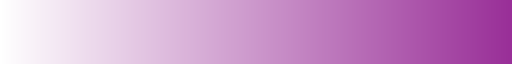

In [6]:
cmap

### Figure 2A

/home/pjoshua/miniconda3/envs/squidpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


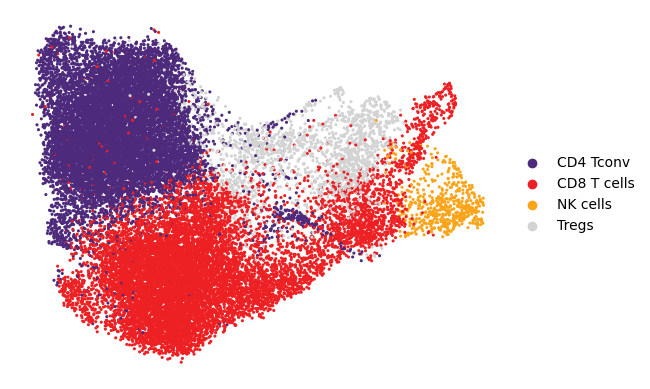

In [49]:
adata.uns['annotation_colors'] = ['#4D2A7C','#ED2024','#FAA41A','#D3D3D3']
fig = sc.pl.umap(adata, color='annotation',frameon=False,return_fig=True,title='',size=20)
plt.savefig('./figures/T_NK_annotated.png', bbox_inches='tight', dpi=550, transparent=True)

/home/pjoshua/miniconda3/envs/squidpy-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


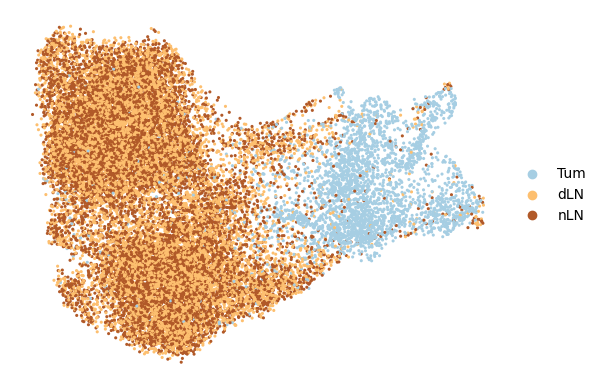

In [48]:
fig = sc.pl.umap(adata, color='tissue',frameon=False,return_fig=True,size=20,title='')
plt.savefig('./figures/T_NK_tissue.png', bbox_inches='tight', dpi=550, transparent=True)

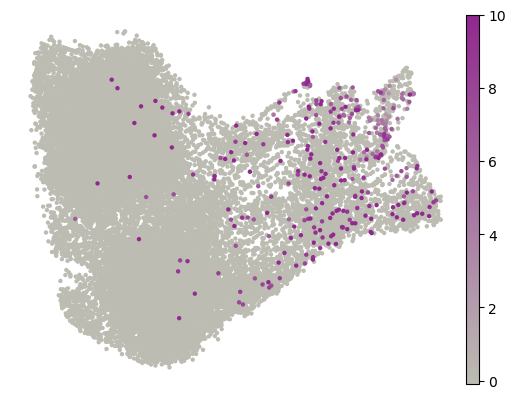

In [11]:
fig = sc.pl.umap(adata,color='Cd38',layer='scaled', return_fig=True, frameon=False,
                 cmap = LinearSegmentedColormap.from_list('PuGr', ['#BCBCB3','#91278F'], N=20000),size=40,title='')
fig.savefig("./figures/T_NK_Cd38_scaled.png", dpi=300,transparent=True)

### Figure 2B

/home/pjoshua/miniconda3/envs/squidpy-env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


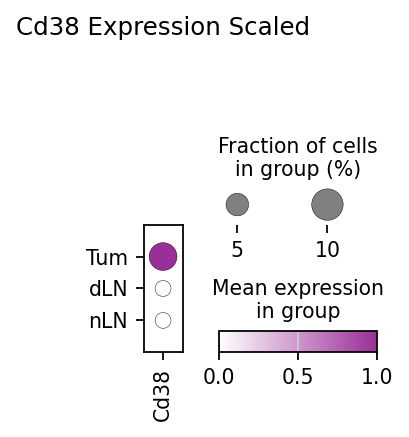

In [11]:
sc.set_figure_params(dpi_save=750, fontsize=11)
sc.pl.dotplot(time, ["Cd38"], groupby='tissue',standard_scale="var", title="Cd38 Expression Scaled", cmap=cmap,
             save="fig1k.png",smallest_dot=50)

### Figure 2C

/home/pjoshua/miniconda3/envs/squidpy-env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


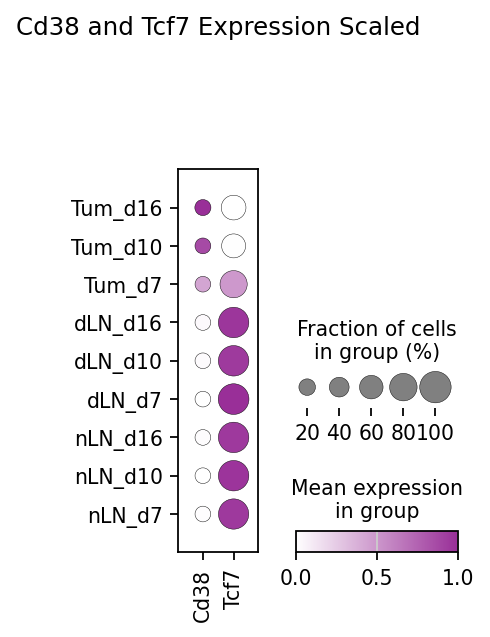

In [8]:
sc.set_figure_params(dpi_save=550, fontsize=11)
sc.pl.dotplot(time, ["Cd38","Tcf7"], groupby='group_ordered',standard_scale="var", title="Cd38 and Tcf7 Expression Scaled", cmap=cmap,
             dot_min=0.1, save="fig1l.pdf",smallest_dot=50)

# Suppl Figure 1: Sade-Feldman et al. 2018

### S1F

In [2]:
feldman = sc.read_h5ad("./adatas/feldman_2018_celltyped.h5ad")
cd8s = {"Exhausted CD8+ T Cells","Exhausted/HS CD8+ T Cells"}
feldman = feldman[feldman.obs.Celltype.isin(cd8s)]

feldman.layers['orig'] = feldman.X.copy()
sc.pp.normalize_total(feldman,target_sum=100000)
feldman.layers['normcounts'] = feldman.X.copy()
sc.pp.log1p(feldman)
feldman.layers['lognormcounts'] = feldman.X.copy()
sc.tl.pca(feldman, svd_solver='arpack')
sc.pp.neighbors(feldman, n_neighbors=5, n_pcs=50)
sc.tl.umap(feldman)
sc.tl.tsne(feldman)

feldman.obs['response'] = feldman.obs['characteristics: response']
feldman.obs['time'] = feldman.obs['characteristics: patient ID (Pre=baseline; Post= on treatment)'].str.split("_").str[0]
feldman

/home/pjoshua/miniconda3/envs/squidpy-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AnnData object with n_obs × n_vars = 3878 × 55737
    obs: 'Sample name', 'title', 'source name', 'organism', 'characteristics: patient ID (Pre=baseline; Post= on treatment)', 'characteristics: response', 'characteristics: therapy', 'Cluster number', 'Celltype', 'response', 'time'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    layers: 'TPM', 'orig', 'normcounts', 'lognormcounts'
    obsp: 'distances', 'connectivities'

In [19]:
sns.set(font_scale=1.5)

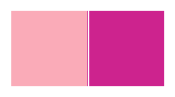

In [13]:
sequential_colors = sns.color_palette("RdPu", 2)
sns.palplot(sequential_colors)

In [20]:
palette = ["#808080", "#992F98"]

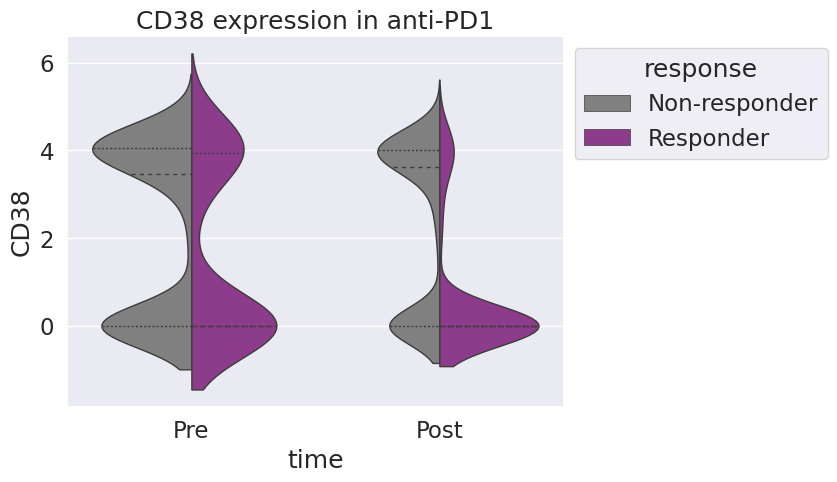

In [24]:
df = sc.get.obs_df(feldman, ["CD38", "time","response","characteristics: therapy"])
ax = sns.violinplot(data=df[df['characteristics: therapy'] == 'anti-PD1'], x='time', y='CD38', hue="response",order=[ "Pre", "Post"],
                    split=True, inner="quart", linewidth=1, legend=False, palette=sns.color_palette(palette, 2))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(left=False, bottom=True)
ax.set(title='CD38 expression in anti-PD1');
ax.figure.savefig('cd38_expr_in_aPD1.png',dpi=600, bbox_inches='tight')

### S1G

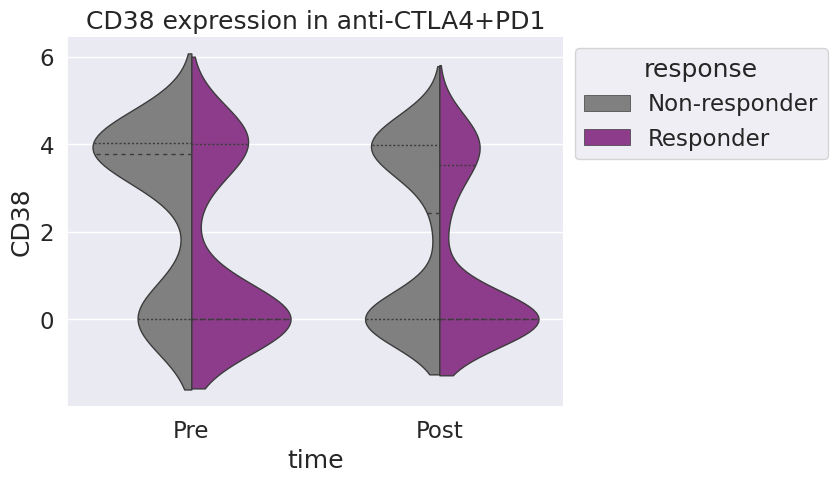

In [25]:
df = sc.get.obs_df(feldman, ["CD38", "time","response","characteristics: therapy"])
ax = sns.violinplot(data=df[df['characteristics: therapy'] == 'anti-CTLA4+PD1'], x='time', y='CD38', hue="response",order=[ "Pre", "Post"],
                    split=True, inner="quart", linewidth=1, palette=sns.color_palette(palette, 2))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine(left=False, bottom=True)
ax.set(title='CD38 expression in anti-CTLA4+PD1');
ax.figure.savefig('cd38_expr_in_CTLA4_aPD1.png',dpi=600, bbox_inches='tight')

# Sup Figure 3A: Bod et al.2023

In [10]:
adata = sc.read_h5ad("timecourse_adata_annotated.h5ad")


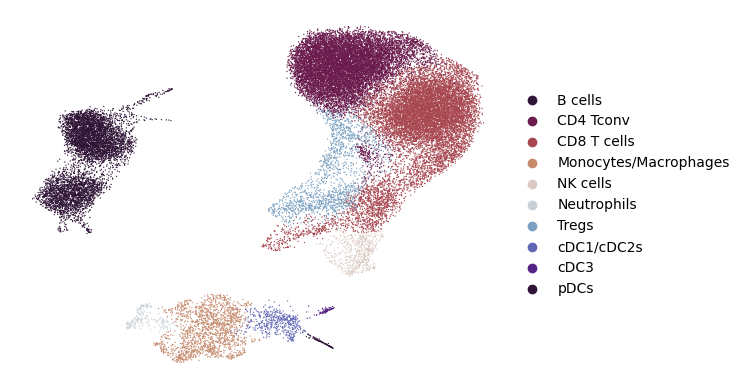

In [14]:
sc.pl.umap(adata, color='annotation', frameon=False, title='', save='_umap_Annotation_timecourse.pdf')

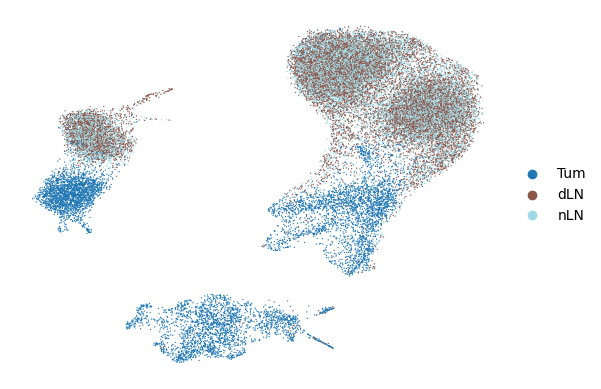

In [15]:
sc.pl.umap(adata, color='tissue', frameon=False, title='', save='_umap_tissue_timecourse.pdf')

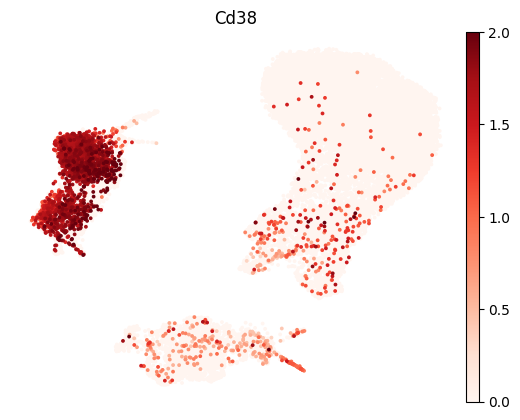

In [28]:
import matplotlib.pyplot as plt

sc.pl.umap(
    adata,
    color='Cd38',
    frameon=False,
    size=30,
    cmap='Reds',
    vmin=0,
    vmax=2,
    show=False,  
    save=None,  
)

cb = plt.gca().collections[-1].colorbar
cb.set_ticks([0, 0.5, 1, 1.5, 2])  

plt.savefig('_umap_cd38_timecourse.pdf', bbox_inches='tight')
plt.show()
